### Info about the data
* Originial File in the form of Sqlite (1.8 Million rows)
* Contains data for Years 1992 - 2015
* We subsetted only California fire data for ease of loading (and github large file constraints)
* Saved data to new file california_fires.csv (feel free to subset even further)
* Load ^ for analysis

### Food for thought
* How long does it take for a fire to get controlled? and how does this controlling duration vary by state - _controlling duration_ (new variable?)

In [65]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [33]:
## ONLY run this if you need the entire dataset
# conn = sqlite3.connect("data/FPA_FOD_20170508.sqlite")
# fires = pd.read_sql_query("SELECT * FROM fires", conn)

In [66]:
# read the subset data
fires = pd.read_csv('data/california_fires.csv')

/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Missing Values

In [67]:
missing_percentage = []
for column in fires.columns:
    missing_percentage.append(str(int(fires[column].isna().sum()/len(fires[column])*100)) + "% missing in "+ column)
missing_percentage.sort()
missing_percentage

['0% missing in DISCOVERY_DATE',
 '0% missing in DISCOVERY_DOY',
 '0% missing in FIRE_SIZE',
 '0% missing in FIRE_SIZE_CLASS',
 '0% missing in FIRE_YEAR',
 '0% missing in LATITUDE',
 '0% missing in LONGITUDE',
 '0% missing in NWCG_REPORTING_AGENCY',
 '0% missing in NWCG_REPORTING_UNIT_ID',
 '0% missing in OBJECTID',
 '0% missing in OWNER_CODE',
 '0% missing in OWNER_DESCR',
 '0% missing in SOURCE_REPORTING_UNIT',
 '0% missing in SOURCE_SYSTEM',
 '0% missing in SOURCE_SYSTEM_TYPE',
 '0% missing in STATE',
 '0% missing in STAT_CAUSE_CODE',
 '0% missing in STAT_CAUSE_DESCR',
 '0% missing in Shape',
 '0% missing in Unnamed: 0',
 '41% missing in DISCOVERY_TIME',
 '51% missing in CONT_DATE',
 '51% missing in CONT_DOY',
 '51% missing in CONT_TIME',
 '7% missing in FIRE_NAME',
 '70% missing in COUNTY',
 '70% missing in FIPS_NAME']

## Describing missing values
* 51% missing values in Date and Day of year of fire containment (controlled) - (COUNNT_DATE, COUNT_DOY)
    * Could be used to calculate the duration of time spent controlling the fire
    * Makes little sense to add random values (mean, ffil, bfill) since its Date
    * Removing the Na rows would be appropriate considering we have a large set of data
* 30% missing in Time of containment
    * No big reason to add Time in our analysis yet.
    * Could leave like this or remove the entire column
    * Removing rows would cause unnecessary loss of data
* \> Unnecessary/Redundant Columns
    * Quite a few of the columns have much significance to the analysis
    * Dropping 7 columns (below)

In [64]:
fires.columns

Index(['Unnamed: 0', 'OBJECTID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'SOURCE_REPORTING_UNIT', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_NAME', 'Shape'],
      dtype='object')

In [51]:
## These columns already removed in california_wildifire.csv 
# # Remove redundant columns with high missing values
# fires = fires.drop(columns=['LOCAL_FIRE_REPORT_ID', 'FIRE_CODE', 'MTBS_ID', 'MTBS_FIRE_NAME', 
#                     'ICS_209_INCIDENT_NUMBER', 'ICS_209_NAME', 'COMPLEX_NAME','FOD_ID', 
#                     'FPA_ID','NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT_NAME',
#                    'LOCAL_FIRE_REPORT_ID', 'LOCAL_INCIDENT_ID','FIPS_CODE'])

### Further analysis - Distribution of missing contained date and time values
* Texas and California have the maximum number of recorded wildfires AND also the maximum number of missing values
* The missinng value perccentage of contained date and time (though 23% for the entire dataset) rise to 40% in California and 80% in Texas. 
* Should we still delete these rows considering we have a large set of data (1.8 mil in total)

In [68]:
no_time_fires = fires[fires['CONT_TIME'].isnull()]
no_date_fires = fires[fires['CONT_DATE'].isnull()]

In [54]:
# sns.set(style="whitegrid")
# g = sns.countplot(pd.Series(no_date_fires.STATE), order = pd.Series(no_date_fires.STATE).value_counts().index).set_title('Missing Values of CONT_DATE by State')
# g.figure.set_size_inches(18.5, 10.5)
# sns.plt.show()

### Missing values over different years.
Maybe pick values for years based on least missing values.

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


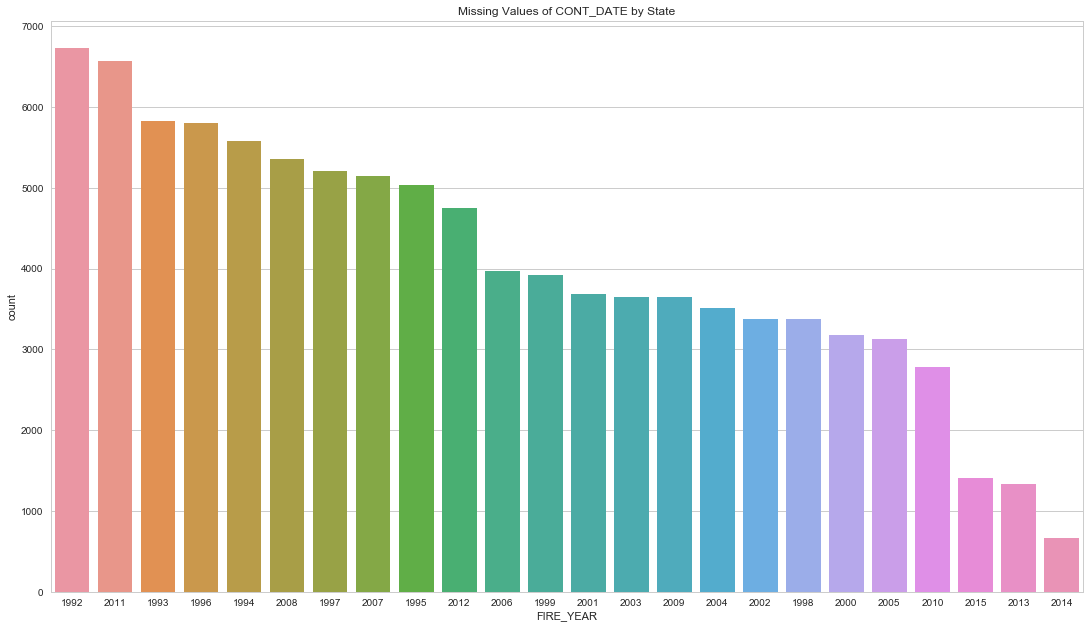

In [57]:
sns.set(style="whitegrid")
g = sns.countplot(pd.Series(no_date_fires.FIRE_YEAR), order = pd.Series(no_date_fires.FIRE_YEAR).value_counts().index).set_title('Missing Values of CONT_DATE by State')
g.figure.set_size_inches(18.5, 10.5)
sns.plt.show()

In [58]:
# Subset to only california
# Already done for california_fires.csv

# fires = fires[fires['STATE'] == 'CA']

In [61]:
# Final data here
print("Length of data")
print(len(fires))
print('Columns')
print(fires.columns)
fires.head()
print(fires.FIRE_YEAR.unique())

Length of data
189550
Columns
Index(['Unnamed: 0', 'OBJECTID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'SOURCE_REPORTING_UNIT', 'FIRE_NAME', 'FIRE_YEAR', 'DISCOVERY_DATE',
       'DISCOVERY_DOY', 'DISCOVERY_TIME', 'STAT_CAUSE_CODE',
       'STAT_CAUSE_DESCR', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME', 'FIRE_SIZE',
       'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_CODE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_NAME', 'Shape'],
      dtype='object')
[2005 2004 2006 2002 2007 2008 2009 1992 1993 1994 1995 1996 1997 1998 1999
 2000 2001 2003 2010 2011 2012 2013 2014 2015]


### Histogram of total Fire occurances by state

/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


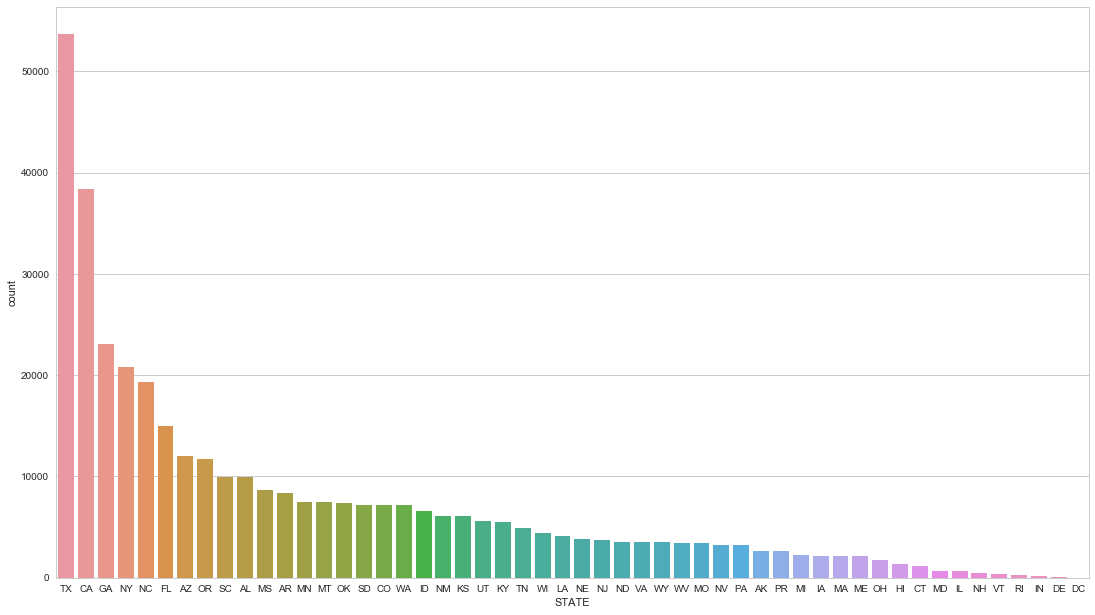

In [125]:

sns.set(style="whitegrid")
g = sns.countplot(pd.Series(fires.STATE), order = pd.Series(fires.STATE).value_counts().index)
g.figure.set_size_inches(18.5, 10.5)
sns.plt.show()

### Mean FIRE_SIZE by State 

In [ ]:
# NOTE : Takes really long to load
# by_state = fires.groupby(['STATE'], as_index=False).mean()
# sns.set(style="whitegrid")
# g = sns.barplot(x="STATE", y="FIRE_SIZE", data=by_state )
# g.figure.set_size_inches(18.5, 10.5)
# sns.plt.show()